# ᲰᲘᲞᲝᲗᲔᲖᲘᲡ ᲢᲔᲡᲢᲘᲠᲔᲑᲐ

ინტერნეტ პროვაიდერი კომპანია ამტკიცებს, რომ მათი მომხმარებლების 60%-ზე მეტი იყენებს პრემიუმ პაკეტს. შერჩევაში 200 მომხმარებლიდან 105-ს აღმოაჩნდა პრემიუმ პაკეტი. შეამოწმეთ კომპანიის მტკიცება 0.05 მნიშვნელოვნების დონეზე (I ტიპის შეცდომის ალბათობის მიმღებლობის დონე).


**ნულოვანი ($H_0$) და ალტერნატიული ($H_1$) ჰიპოთეზები.**


In [9]:
# მონაცემები
n = 200  # შერჩევის ზომა
x = 105  # წარმატებების რაოდენობა
pr_0 = 0.60  # საცდელი პროპორცია

print("ჰიპოთეზების ტესტირება პროპორციისთვის")
print("-" * 50)

print("H0 (ნულოვანი ჰიპოთეზა): 𝑝 ≤ 0.60 (მომხმარებელთა 60%-ზე ნაკლები ან ტოლი იყენებს პრემიუმ პაკეტს)")
print("H1 (ალტერნატიული ჰიპოთეზა): 𝑝 > 0.60 (მომხმარებელთა 60%-ზე მეტი იყენებს პრემიუმ პაკეტს)")


ჰიპოთეზების ტესტირება პროპორციისთვის
--------------------------------------------------
H0 (ნულოვანი ჰიპოთეზა): 𝑝 ≤ 0.60 (მომხმარებელთა 60%-ზე ნაკლები ან ტოლი იყენებს პრემიუმ პაკეტს)
H1 (ალტერნატიული ჰიპოთეზა): 𝑝 > 0.60 (მომხმარებელთა 60%-ზე მეტი იყენებს პრემიუმ პაკეტს)


**შერჩევის z-სტატისტიკა**



In [16]:
import numpy as np

n = 200
x = 105
pr_0 = 0.60
pr_hat = x/n


# 1. გამოთვალეთ შერჩევის სტანდარტული შეცდომა
std_error = np.sqrt(pr_0 * (1 - pr_0) / n)

# 2. გამოთვალეთ z-სტატისტიკა
z_stat = (pr_hat - pr_0) / std_error

print(f"z-სტატისტიკა = {z_stat:.3f}")

z-სტატისტიკა = -2.165


**p-მნიშვნელობა და გადაწყვეტილების მიღება**

In [21]:
from scipy import stats

z_stat = z_stat   # წინა დავალებაში გამოთვლილი
alpha = 0.05

# 1. გამოთვალეთ p-მნიშვნელობა ცალმხრივი ტესტისთვის
p_value = 1 - stats.norm.cdf(z_stat)    # გამოიყენეთ stats.norm.cdf ფუნქცია

print(f"p-მნიშვნელობა = {p_value:.4f}")

# 2. მიიღეთ გადაწყვეტილება
if p_value < alpha:
    print(f"უარვყოფთ H₀-ს, რადგან - > p ({p_value:.4f}) < α ({alpha}))") # დაასრულეთ
else:
    print(f"ვერ უარვყოფთ H₀-ს, რადგან - > p ({p_value:.4f}) > α ({alpha})") # დაასრულეთ

p-მნიშვნელობა = 0.9848
ვერ უარვყოფთ H₀-ს, რადგან - > p (0.9848) > α (0.05)


**ინტერპრეტაცია**

In [25]:
# მონაცემები
n = 200
x = 105
pi_hat = x/n
p_value = p_value # წინა დავალებაში გამოთვლილი
alpha = 0.05

print("შედეგების ინტერპრეტაცია:")
print("-" * 50)

# 1. დაბეჭდეთ შერჩევის პროპორცია პროცენტულად
print(f"შერჩევის პროპორცია: {pi_hat * 100:.2f}%")

# 2. დაბეჭდეთ დასკვნა სტატისტიკური მნიშვნელოვნების შესახებ
if p_value < alpha:
    print("დადასტურდა, რომ მომხმარებელთა 60%-ზე მეტი იყენებს პრემიუმ პაკეტს")  # დაასრულეთ ინტერპრეტაცია
else:
    print("არ დადასტურდა, რომ მომხმარებელთა 60%-ზე მეტი იყენებს პრემიუმ პაკეტს")  # დაასრულეთ ინტერპრეტაცია

შედეგების ინტერპრეტაცია:
--------------------------------------------------
შერჩევის პროპორცია: 52.50%
არ დადასტურდა, რომ მომხმარებელთა 60%-ზე მეტი იყენებს პრემიუმ პაკეტს


# ᲐᲛᲝᲕᲐᲠᲓᲜᲘᲚᲘ ᲛᲜᲘᲨᲕᲜᲔᲚᲝᲑᲔᲑᲘ (outliers)

_თქვენ გადმოგეცათ თანამშრომელთა ყოველთვიური გამომუშავების მონაცემები (earnings.csv)._

**z-ქულის (სტანდარტული გადახრის) მეთოდით**

<Figure size 1000x600 with 0 Axes>

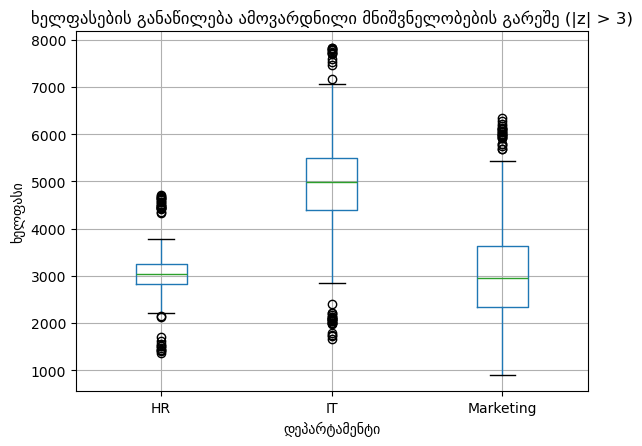


ამოვარდნილი მნიშვნელობების ანგარიში (z-score მეთოდი):
სრული მონაცემები: 2000
ამოვარდნილი მნიშვნელობების გარეშე: 1980
ამოვარდნილი მნიშვნელობების რიცხვი: 20


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# მონაცემების ჩატვირთვა
df = pd.read_csv('earnings.csv')

# z-ქულების გამოთვლა
df['z_score'] =stats.zscore(df['Salary'])

# ამოვარდნილი მნიშვნელობების ფილტრაცია z-ქულის მეთოდით
df_no_outliers_zscore =df[np.abs(df['z_score']) <= 3]

# box plot ვიზუალიზება
plt.figure(figsize=(10, 6))
df_no_outliers_zscore.boxplot(column='Salary', by='Department')

plt.title('ხელფასების განაწილება ამოვარდნილი მნიშვნელობების გარეშე (|z| > 3)')
plt.suptitle('')
plt.xlabel('დეპარტამენტი')
plt.ylabel('ხელფასი')
plt.show()

print("\nამოვარდნილი მნიშვნელობების ანგარიში (z-score მეთოდი):")
print(f"სრული მონაცემები: {len(df)}")
print(f"ამოვარდნილი მნიშვნელობების გარეშე: {len(df_no_outliers_zscore)}")
print(f"ამოვარდნილი მნიშვნელობების რიცხვი: {len(df) - len(df_no_outliers_zscore)}")

**IQR (ინტერკვარტილური დიაპაზონის) მეთოდით**

<Figure size 1000x600 with 0 Axes>

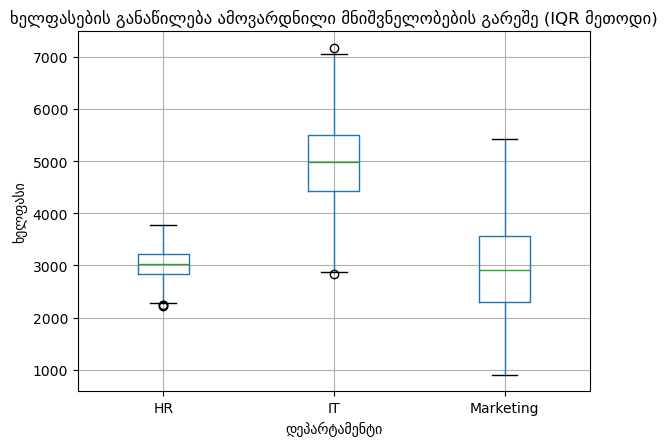


ამოვარდნილი მნიშვნელობების ანგარიში (IQR მეთოდი):
სრული მონაცემები: 2000
ამოვარდნილი მნიშვნელობების გარეშე: 1891
ამოვარდნილი მნიშვნელობების რიცხვი: 109


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('earnings.csv')

# IQR-ის გამოთვლა
Q1 = df.groupby('Department')['Salary'].quantile(0.25)
Q3 =df.groupby('Department')['Salary'].quantile(0.75)
IQR = Q3 - Q1

# ზღვრების განსაზღვრა
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ამოვარდნილი მნიშვნელობების ფილტრაცია IQR მეთოდით
df_no_outliers_iqr = df[~((df['Salary'] < lower_bound[df['Department']].values) |
                          (df['Salary'] > upper_bound[df['Department']].values))]

# ვიზუალიზება
plt.figure(figsize=(10, 6))
df_no_outliers_iqr.boxplot(column='Salary', by='Department')

plt.title('ხელფასების განაწილება ამოვარდნილი მნიშვნელობების გარეშე (IQR მეთოდი)')
plt.suptitle('')
plt.xlabel('დეპარტამენტი')
plt.ylabel('ხელფასი')
plt.show()

# შედეგების ბეჭდვა
print("\nამოვარდნილი მნიშვნელობების ანგარიში (IQR მეთოდი):")
print(f"სრული მონაცემები: {len(df)}")
print(f"ამოვარდნილი მნიშვნელობების გარეშე: {len(df_no_outliers_iqr)}")
print(f"ამოვარდნილი მნიშვნელობების რიცხვი: {len(df) - len(df_no_outliers_iqr)}")